In [51]:
%pylab inline
import warnings
warnings.simplefilter('ignore', np.RankWarning)

Populating the interactive namespace from numpy and matplotlib


In [76]:
with open('fake_regression.txt','r') as infile:
    x=[[float(dato) for dato in line.rstrip().split(' ')] for line in infile]

x=array(x)
num_data=shape(x)[0]
num_training = int(round(0.75*num_data))
num_test = num_data-num_training

training_index = array(random.permutation(num_data)[:num_training])
test_index = array(list(set(arange(num_data))-set(training_index)))

Datos_training = x[training_index,:]
Datos_test = x[test_index,:]

In [77]:
def get_error(data,p):
    error = sum((data[:,1]-polyval(p,data[:,0]))**2)
    return error

In [100]:
Num_fits = 20
Error_fit=zeros(Num_fits)
Bias_fit=zeros(Num_fits)
#plot(Datos_training[:,0],Datos_training[:,1],'.b')

for i in range(1,Num_fits+1):
    p = polyfit(Datos_training[:,0],Datos_training[:,1], i)
    e = get_error(Datos_training,p)
    b = get_error(Datos_test,p)
    Error_fit[i-1]=e
    Bias_fit[i-1]=b
    #plot(Datos_training[:,0],polyval(p,Datos_training[:,0]),'.',label=str(i))
#legend()


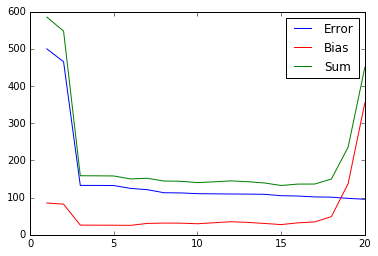

In [92]:
plot(range(1,Num_fits+1),Error_fit,'b',label='Error')
plot(range(1,Num_fits+1),Bias_fit,'r',label='Bias')
plot(range(1,Num_fits+1),Bias_fit+Error_fit,'g',label='Sum')
legend()

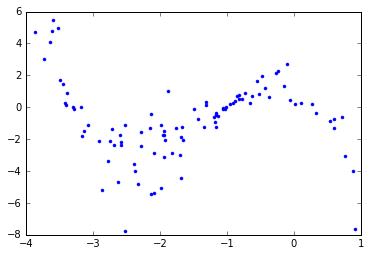

In [96]:
plot(x[:,0],x[:,1],'.')